## To visualize vector field and curl,gradient and divergence value

In [34]:
from dolfin import *

### Define mesh

In [35]:
mesh = UnitSquareMesh(10, 10)

### Define expression

In [46]:
f = Expression(["pow(x[0],2)-0.5","x[1]-0.5"], degree=2)

## Visualization of divergence

In [47]:
V = FunctionSpace(mesh, "CG", 1)

### Vector function space

In [48]:
U= VectorFunctionSpace(mesh, "CG", 1)

In [65]:
f = project(f,U)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [50]:
a=project(div(f),V)

In [51]:
xdmf_file = XDMFFile("div.xdmf")

In [52]:
xdmf_file.parameters["functions_share_mesh"] = True
# Default is false, it controls whether all functions on a single time step share the same mesh. If true the files created will be smaller and also behave better in Paraview, at least in version 5.3.0.
xdmf_file.parameters["rewrite_function_mesh"] = False
# Default settings is true, i.e, it controls whether the mesh will be rewritten every time step. If the mesh does not change this can be turned off to create smaller files. 
xdmf_file.parameters["flush_output"] = False
# Default is false, it controls the file size. Yo

In [53]:
a.rename("div","div")
f.rename("vector field","vector field")

In [54]:
xdmf_file.write(a,1)
xdmf_file.write(f,1)
xdmf_file.close()

plot(a, title="Div solution gradient")

## Visualization of Gradient

### Tensor function space

In [55]:
T = TensorFunctionSpace(mesh, "CG", 1)

In [56]:
b=project(grad(f),T)

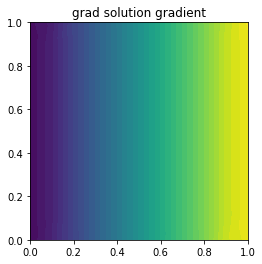

In [57]:
plot(b[0,0], title="grad solution gradient")

## Visualization of Curl 

### Scalar function space

In [58]:
c=project(curl(f),V)

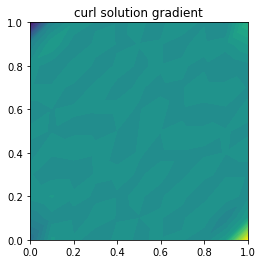

In [59]:
plot(c, title="curl solution gradient")

In [60]:
curl_xdmf_file = XDMFFile("curl.xdmf")

In [61]:
curl_xdmf_file.parameters["functions_share_mesh"] = True
# Default is false, it controls whether all functions on a single time step share the same mesh. If true the files created will be smaller and also behave better in Paraview, at least in version 5.3.0.
curl_xdmf_file.parameters["rewrite_function_mesh"] = False
# Default settings is true, i.e, it controls whether the mesh will be rewritten every time step. If the mesh does not change this can be turned off to create smaller files. 
curl_xdmf_file.parameters["flush_output"] = False
# Default is false, it controls the file size. Yo

In [62]:
c.rename("curl","curl")
f.rename("vector field","vector field")

In [63]:
curl_xdmf_file.write(c,1)
curl_xdmf_file.write(f,1)
curl_xdmf_file.close()